<a href="https://colab.research.google.com/github/nahyunryou/Machine_Learning/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

Chapter 2

In [31]:
cd /content/drive/MyDrive/ML/

/content/drive/MyDrive/ML


In [32]:
df = pd.read_csv('ch_02/data/earthquakes.csv') 

In [3]:
np.random.seed(0) # set seed so result is reproducible
pd.DataFrame(
    {
        'random': np.random.rand(5),
        'text': ['hot', 'warm', 'cool', 'cold', None],
        'truth': [np.random.choice([True, False]) for _ in range(5)]
    }, 
    index=pd.date_range(
        end=dt.date(2019, 4, 21),
        freq='1D',
        periods=5, 
        name='date'
    )
)

,random,text,truth
date,,,
2019-04-17,0.548814,hot,False
2019-04-18,0.715189,warm,True
2019-04-19,0.602763,cool,True
2019-04-20,0.544883,cold,False
2019-04-21,0.423655,None,True


In [4]:
pd.DataFrame([
    {'mag': 5.2, 'place': 'California'},
    {'mag': 1.2, 'place': 'Alaska'},
    {'mag': 0.2, 'place': 'California'},
])

,mag,place
0,5.2,California
1,1.2,Alaska
2,0.2,California


In [5]:
list_of_tuples = [(n, n**2, n**3) for n in range(5)]
list_of_tuples

pd.DataFrame(
    list_of_tuples, 
    columns=['n', 'n_squared', 'n_cubed']
)

,n,n_squared,n_cubed
0,0,0,0
1,1,1,1
2,2,4,8
3,3,9,27
4,4,16,64


In [6]:
pd.DataFrame(
    np.array([
        [0, 0, 0],
        [1, 1, 1],
        [2, 4, 8],
        [3, 9, 27],
        [4, 16, 64]
    ]), columns=['n', 'n_squared', 'n_cubed']
)

,n,n_squared,n_cubed
0,0,0,0
1,1,1,1
2,2,4,8
3,3,9,27
4,4,16,64


In [12]:
## title, time, mag로 시작하는 column 불러오기
df[
    ['title', 'time']
    + [col for col in df.columns if col.startswith('mag')]
]

,title,time,mag,magType
0,"M 1.4 - 9km NE of Aguanga, CA",1539475168010,1.35,ml
1,"M 1.3 - 9km NE of Aguanga, CA",1539475129610,1.29,ml
2,"M 3.4 - 8km NE of Aguanga, CA",1539475062610,3.42,ml
3,"M 0.4 - 9km NE of Aguanga, CA",1539474978070,0.44,ml
4,"M 2.2 - 10km NW of Avenal, CA",1539474716050,2.16,md
...,...,...,...,...
9327,"M 0.6 - 9km ENE of Mammoth Lakes, CA",1537230228060,0.62,md
9328,"M 1.0 - 3km W of Julian, CA",1537230135130,1.00,ml
9329,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",1537229908180,2.40,md
9330,"M 1.1 - 9km NE of Aguanga, CA",1537229545350,1.10,ml


In [14]:
# selecting columns and rows

df[['title', 'time']][100:103]

,title,time
100,"M 1.2 - 25km NW of Ester, Alaska",1539435449480
101,"M 0.6 - 8km ESE of Mammoth Lakes, CA",1539435391320
102,"M 1.3 - 8km ENE of Aguanga, CA",1539435293090


In [16]:
# loc : label based location

df.loc[10:15, ['title', 'mag']]

,title,mag
10,"M 0.5 - 10km NE of Aguanga, CA",0.50
11,"M 2.8 - 53km SE of Punta Cana, Dominican Republic",2.77
12,"M 0.5 - 9km NE of Aguanga, CA",0.50
13,"M 4.5 - 120km SSW of Banda Aceh, Indonesia",4.50
14,"M 2.1 - 14km NW of Parkfield, CA",2.13
15,"M 2.0 - 156km WNW of Haines Junction, Canada",2.00


In [15]:
# iloc : integer based location

df.iloc[10:15, [19, 8]]

,title,mag
10,"M 0.5 - 10km NE of Aguanga, CA",0.50
11,"M 2.8 - 53km SE of Punta Cana, Dominican Republic",2.77
12,"M 0.5 - 9km NE of Aguanga, CA",0.50
13,"M 4.5 - 120km SSW of Banda Aceh, Indonesia",4.50
14,"M 2.1 - 14km NW of Parkfield, CA",2.13


In [17]:
df.iloc[10:15, 6:10]

,gap,ids,mag,magType
10,57.0,",ci37389162,",0.50,ml
11,186.0,",pr2018286010,",2.77,md
12,76.0,",ci37389146,",0.50,ml
13,157.0,",us1000hbti,",4.50,mb
14,71.0,",nc73096921,",2.13,md


In [18]:
df.loc[10:14, 'gap':'magType']

,gap,ids,mag,magType
10,57.0,",ci37389162,",0.50,ml
11,186.0,",pr2018286010,",2.77,md
12,76.0,",ci37389146,",0.50,ml
13,157.0,",us1000hbti,",4.50,mb
14,71.0,",nc73096921,",2.13,md


In [19]:
df.loc[
    (df.tsunami == 1) & (df.alert == 'red'),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
5263,red,7.5,mww,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake


In [ ]:
df.loc[
    (df.place.str.contains('Alaska')) & (df.alert.notnull()), # get non null: nonnul()
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

In [20]:
df.loc[
    (df.place.str.contains(r'CA|California$')) & (df.mag > 3.8), # 뒤($)에 CA or California 붙는거
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
1465,green,3.83,mw,"M 3.8 - 109km WNW of Trinidad, CA",0,earthquake
2414,green,3.83,mw,"M 3.8 - 5km SW of Tres Pinos, CA",1,earthquake


In [21]:
df.loc[
    df.magType.isin(['mw', 'mwb']),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
995,NaN,3.35,mw,"M 3.4 - 9km WNW of Cobb, CA",0,earthquake
1465,green,3.83,mw,"M 3.8 - 109km WNW of Trinidad, CA",0,earthquake
2414,green,3.83,mw,"M 3.8 - 5km SW of Tres Pinos, CA",1,earthquake
4988,green,4.41,mw,"M 4.4 - 1km SE of Delta, B.C., MX",1,earthquake
6307,green,5.80,mwb,"M 5.8 - 297km NNE of Ndoi Island, Fiji",0,earthquake
8257,green,5.70,mwb,"M 5.7 - 175km SSE of Lambasa, Fiji",0,earthquake


In [23]:
# grab all the columns that contain a string with the like parameter
df.set_index('place').filter(like='Japan', axis=0).filter(items=['mag', 'magType', 'title']).head()

,mag,magType,title
place,,,
"160km NNW of Nago, Japan",4.6,mb,"M 4.6 - 160km NNW of Nago, Japan"
"7km ESE of Asahi, Japan",5.2,mww,"M 5.2 - 7km ESE of Asahi, Japan"
"14km E of Tomakomai, Japan",4.5,mwr,"M 4.5 - 14km E of Tomakomai, Japan"
"139km WSW of Naze, Japan",4.7,mb,"M 4.7 - 139km WSW of Naze, Japan"
"53km ESE of Kamaishi, Japan",4.6,mb,"M 4.6 - 53km ESE of Kamaishi, Japan"


In [24]:
# select any columns that start with t
df.filter(regex=r'^t').head()

,time,title,tsunami,type,types,tz
0,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
1,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
2,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0
3,1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0
4,1539474716050,"M 2.2 - 10km NW of Avenal, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0


In [ ]:
# delete column
try:
    del df['source']
except KeyError:
    # handle the error here
    print('not there anymore')

In [ ]:
cols_to_drop = [
    col for col in df.columns
    if col not in ['alert', 'mag', 'title', 'time', 'tsunami'] # 여기 없는거 drop
]
df.drop(columns=cols_to_drop).head()

Chapter 3 

In [33]:
wide_df = pd.read_csv('ch_03/data/wide_data.csv', parse_dates=['date'])
long_df = pd.read_csv(
    'ch_03/data/long_data.csv', 
    usecols=['date', 'datatype', 'value'], 
    parse_dates=['date']
)[['date', 'datatype', 'value']] # sort columns

In [34]:
wide_df.head()

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9


In [35]:
long_df.head()

,date,datatype,value
0,2018-10-01,TMAX,21.1
1,2018-10-01,TMIN,8.9
2,2018-10-01,TOBS,13.9
3,2018-10-02,TMAX,23.9
4,2018-10-02,TMIN,13.9


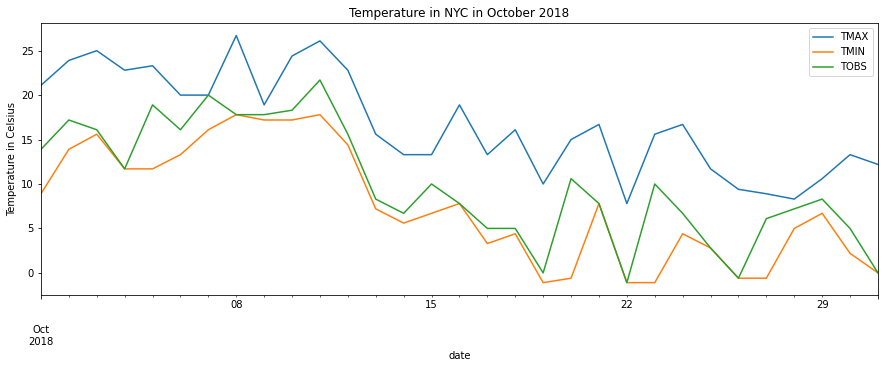

In [36]:
# wide : pandas
wide_df.plot(
    x='date', y=['TMAX', 'TMIN', 'TOBS'], figsize=(15, 5), 
    title='Temperature in NYC in October 2018'
).set_ylabel('Temperature in Celsius')
plt.show()

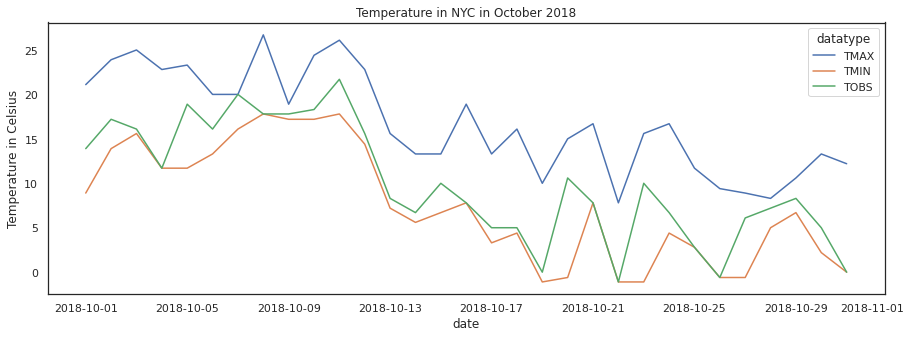

In [38]:
# long: seaborn
sns.set(rc={'figure.figsize': (15, 5)}, style='white')

ax = sns.lineplot(
    data=long_df, x='date', y='value', hue='datatype'
)
ax.set_ylabel('Temperature in Celsius')
ax.set_title('Temperature in NYC in October 2018')
plt.show()

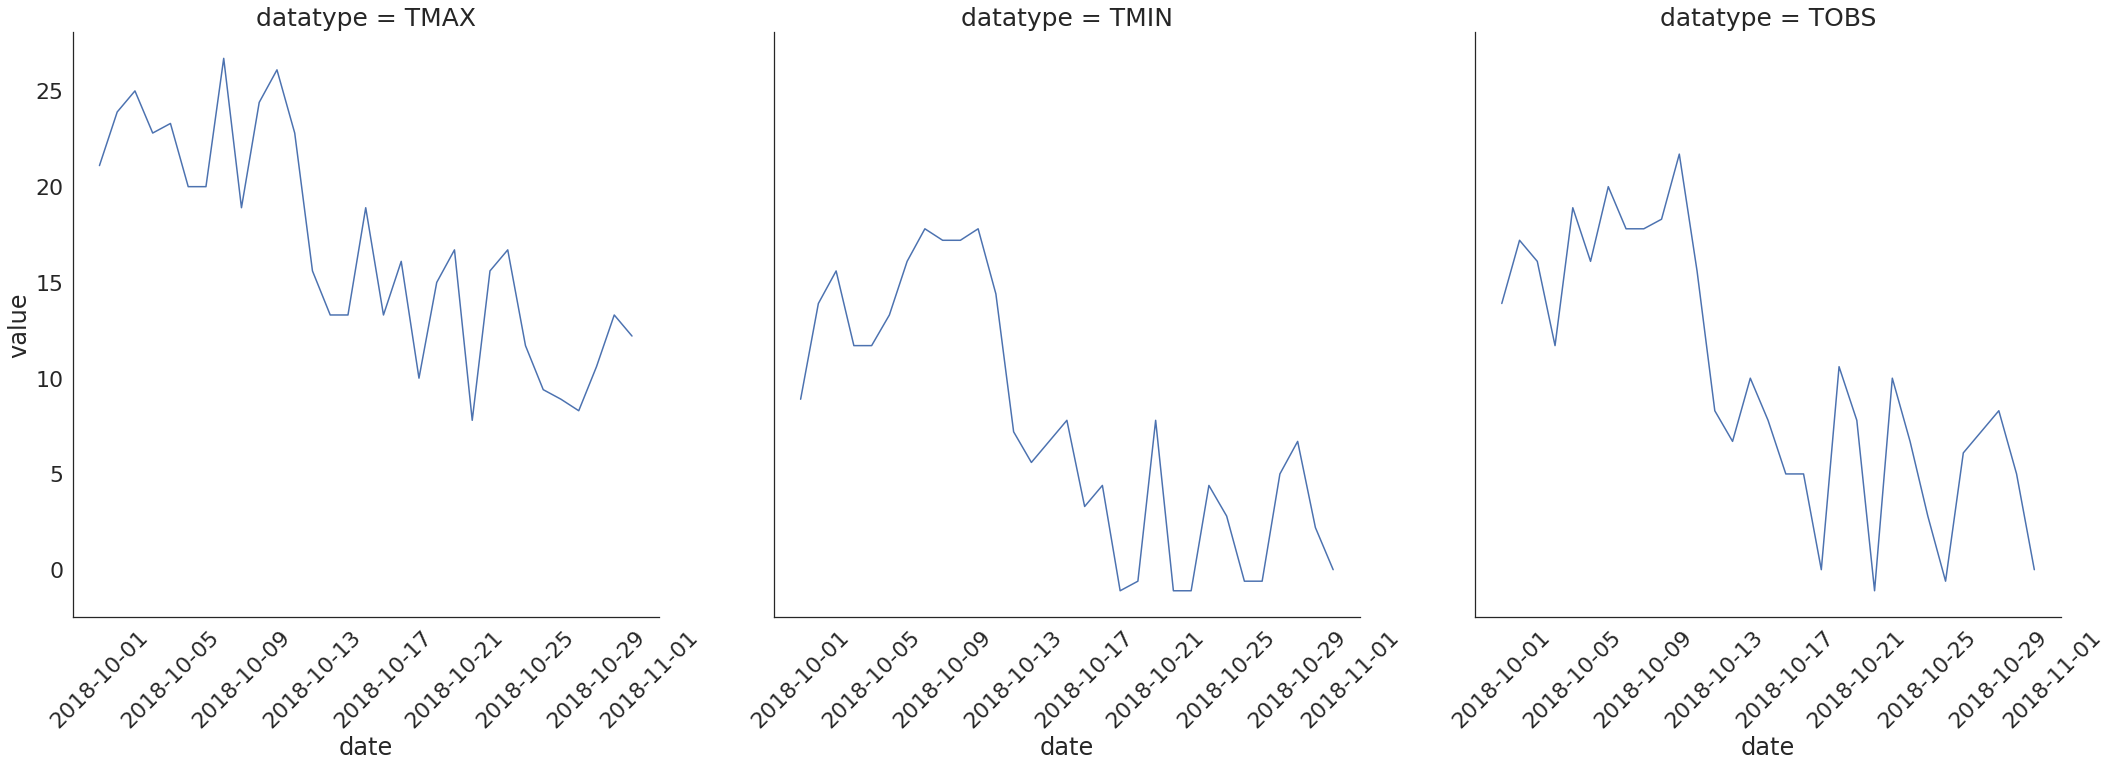

In [39]:
sns.set(
    rc={'figure.figsize': (20, 10)}, style='white', font_scale=2
)

g = sns.FacetGrid(long_df, col='datatype', height=10) ## FacetGrid
g = g.map(plt.plot, 'date', 'value')
g.set_titles(size=25)
g.set_xticklabels(rotation=45)
plt.show()

In [43]:
df = pd.read_csv('ch_03/data/nyc_temperatures.csv')

In [44]:
df.head()

,date,datatype,station,attributes,value
0,2018-10-01T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
1,2018-10-01T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2,2018-10-01T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
3,2018-10-02T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
4,2018-10-02T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


In [45]:
df.rename(
    columns={
        'value': 'temp_C',
        'attributes': 'flags'
    }, inplace=True
)

In [47]:
df.columns

Index(['date', 'datatype', 'station', 'flags', 'temp_C'], dtype='object')

In [49]:
df.dtypes

date         object
datatype     object
station      object
flags        object
temp_C      float64
dtype: object

In [50]:
# convert it into a datetime
df.loc[:,'date'] = pd.to_datetime(df.date)
df.dtypes

date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
dtype: object

In [51]:
df = pd.read_csv('ch_03/data/nyc_temperatures.csv').rename(
    columns={
        'value': 'temp_C',
        'attributes': 'flags'
    }
)

# assign() method for working with multiple columns at once
new_df = df.assign(
    date=pd.to_datetime(df.date),
    temp_F=(df.temp_C * 9/5) + 32
)
new_df.dtypes

date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
temp_F             float64
dtype: object

In [52]:
pd.Categorical(
    ['med', 'med', 'low', 'high'], 
    categories=['low', 'med', 'high'],
    ordered=True
)

['med', 'med', 'low', 'high']
Categories (3, object): ['low' < 'med' < 'high']

In [54]:
df[df.datatype == 'TMAX'].sort_values(by='temp_C', ascending=False).head(10)

,date,datatype,station,flags,temp_C
19,2018-10-07T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",27.8
28,2018-10-10T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",27.8
31,2018-10-11T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.7
10,2018-10-04T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1
4,2018-10-02T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1
1,2018-10-01T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
25,2018-10-09T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
7,2018-10-03T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.0
13,2018-10-05T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",22.8
22,2018-10-08T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",22.8


In [55]:
df[df.datatype == 'TMAX'].sort_values(by=['temp_C', 'date'], ascending=[False, True], ignore_index=True).head(10)

,date,datatype,station,flags,temp_C
0,2018-10-07T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",27.8
1,2018-10-10T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",27.8
2,2018-10-11T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.7
3,2018-10-02T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1
4,2018-10-04T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1
5,2018-10-01T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
6,2018-10-09T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
7,2018-10-03T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.0
8,2018-10-05T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",22.8
9,2018-10-08T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",22.8


In [56]:
df[df.datatype == 'TAVG'].nlargest(n=10, columns='temp_C') # 10 largest values 
# nsmallest

,date,datatype,station,flags,temp_C
27,2018-10-10T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",23.8
30,2018-10-11T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",23.4
18,2018-10-07T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",22.8
3,2018-10-02T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
6,2018-10-03T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.8
24,2018-10-09T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.8
9,2018-10-04T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.3
0,2018-10-01T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
21,2018-10-08T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",20.9
12,2018-10-05T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",20.3


In [60]:
df.sort_index(axis = 1).head()

,datatype,flags,station,temp_C
date,,,,
2018-10-01T00:00:00,TAVG,"H,,S,",GHCND:USW00014732,21.2
2018-10-01T00:00:00,TMAX,",,W,2400",GHCND:USW00014732,25.6
2018-10-01T00:00:00,TMIN,",,W,2400",GHCND:USW00014732,18.3
2018-10-02T00:00:00,TAVG,"H,,S,",GHCND:USW00014732,22.7
2018-10-02T00:00:00,TMAX,",,W,2400",GHCND:USW00014732,26.1


In [57]:
df.set_index('date', inplace=True)
df.head()

,datatype,station,flags,temp_C
date,,,,
2018-10-01T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
2018-10-01T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2018-10-01T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
2018-10-02T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
2018-10-02T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


In [59]:
df.reset_index().head()

,date,datatype,station,flags,temp_C
0,2018-10-01T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
1,2018-10-01T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2,2018-10-01T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
3,2018-10-02T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
4,2018-10-02T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


In [64]:
long_df = pd.read_csv(
    'ch_03/data/long_data.csv', usecols=['date', 'datatype', 'value']
).rename(
    columns={'value': 'temp_C'}
).assign(
    date=lambda x: pd.to_datetime(x.date),
    temp_F=lambda x: (x.temp_C * 9/5) + 32
)
long_df.head()

,datatype,date,temp_C,temp_F
0,TMAX,2018-10-01,21.1,69.98
1,TMIN,2018-10-01,8.9,48.02
2,TOBS,2018-10-01,13.9,57.02
3,TMAX,2018-10-02,23.9,75.02
4,TMIN,2018-10-02,13.9,57.02


In [62]:
# transpose
long_df.set_index('date').head(6).T

date,2018-10-01,2018-10-01,2018-10-01,2018-10-02,2018-10-02,2018-10-02
datatype,TMAX,TMIN,TOBS,TMAX,TMIN,TOBS
temp_C,21.1,8.9,13.9,23.9,13.9,17.2
temp_F,69.98,48.02,57.02,75.02,57.02,62.96


In [65]:
# pivot
pivoted_df = long_df.pivot(
    index='date', columns='datatype', values='temp_C'
)
pivoted_df.head()

datatype,TMAX,TMIN,TOBS
date,,,
2018-10-01,21.1,8.9,13.9
2018-10-02,23.9,13.9,17.2
2018-10-03,25.0,15.6,16.1
2018-10-04,22.8,11.7,11.7
2018-10-05,23.3,11.7,18.9


In [66]:
pivoted_df = long_df.pivot(
    index='date', columns='datatype', values=['temp_C', 'temp_F']
)
pivoted_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

In [68]:
# multindex
multi_index_df = long_df.set_index(['date', 'datatype'])
multi_index_df.head()
# multi_index_df.reset_index() : go back to original

temp_C  temp_F
date       datatype                
2018-10-01 TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02

In [70]:
# unstack
unstacked_df = multi_index_df.unstack() # similar to pivot
unstacked_df.head()
# unstack(fill_value=-40) : can fill missing values

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

In [71]:
wide_df = pd.read_csv('ch_03/data/wide_data.csv')
wide_df.head()

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9


In [72]:
# melt
melted_df = wide_df.melt(
    id_vars='date',
    value_vars=['TMAX', 'TMIN', 'TOBS'],
    value_name='temp_C',
    var_name='measurement'
)
melted_df.head()

,date,measurement,temp_C
0,2018-10-01,TMAX,21.1
1,2018-10-02,TMAX,23.9
2,2018-10-03,TMAX,25.0
3,2018-10-04,TMAX,22.8
4,2018-10-05,TMAX,23.3


In [73]:
wide_df.set_index('date', inplace=True)
wide_df.head()

,TMAX,TMIN,TOBS
date,,,
2018-10-01,21.1,8.9,13.9
2018-10-02,23.9,13.9,17.2
2018-10-03,25.0,15.6,16.1
2018-10-04,22.8,11.7,11.7
2018-10-05,23.3,11.7,18.9


In [74]:
df = pd.read_csv('ch_03/data/dirty_data.csv')

In [75]:
df[df.inclement_weather.isna()].shape[0] # null

357

In [76]:
df[df.SNWD.isin([-np.inf, np.inf])].shape[0] # inf

577

In [77]:
df[df.duplicated()].shape[0] # duplicated() method to find duplicate rows

284

In [78]:
# The default for keep is 'first' meaning it won't show the first row that the duplicated data was seen in; we can pass in False to see it though:
df[df.duplicated(keep=False)].shape[0] 

482

In [79]:
df[df.duplicated()].head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
5,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
6,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
8,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True


In [80]:
df[~df.duplicated(keep='first')]

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
7,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
9,2018-01-05T00:00:00,?,0.3,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
755,2018-12-28T00:00:00,GHCND:USC00280907,11.7,0.0,-inf,6.1,-1.7,5.0,NaN,False
757,2018-12-29T00:00:00,?,21.3,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
759,2018-12-30T00:00:00,?,0.0,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
760,2018-12-31T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,3.3,-3.3,-2.8,NaN,False


In [82]:
# 1. make the date a datetime
df.date = pd.to_datetime(df.date)

# 2. save this information for later
station_qm_wesf = df[df.station == '?'].drop_duplicates('date').set_index('date').WESF

# 3. sort ? to the bottom
df.sort_values('station', ascending=False, inplace=True)

# 4. drop duplicates based on the date column keeping the first occurrence 
# which will be the valid station if it has data
df_deduped = df.drop_duplicates('date')

# 5. remove the station column because we are done with it
df_deduped = df_deduped.drop(columns='station').set_index('date').sort_index()

# 6. take valid station's WESF and fall back on station ? if it is null
df_deduped = df_deduped.assign(
    WESF=lambda x: x.WESF.combine_first(station_qm_wesf)
)

df_deduped.shape

(324, 8)

In [83]:
df_deduped.dropna().shape # drop any null data

(4, 8)

In [84]:
df_deduped.dropna(how='all').shape # rows with all null data

(324, 8)

In [85]:
df_deduped.dropna(
    how='all', subset=['inclement_weather', 'SNOW', 'SNWD'] # all null in subset
).shape

(293, 8)

In [86]:
df_deduped.dropna(axis='columns', thresh=df_deduped.shape[0] * .75).columns  # 75% of rows: threshold for the number of null values that must be observed

Index(['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS', 'inclement_weather'], dtype='object')

In [ ]:
df_deduped.loc[:,'WESF'].fillna(0, inplace=True) # WESF column에 fill null with 0
df_deduped.head()

In [ ]:
df_deduped = df_deduped.assign(
    TMAX=lambda x: x.TMAX.replace(5505, np.nan), # fill unreasonable to np.nan
    TMIN=lambda x: x.TMIN.replace(-40, np.nan),
)

In [ ]:
df_deduped.assign(
    TMAX=lambda x: x.TMAX.fillna(method='ffill'), # fill nan with ffill / bfill
    TMIN=lambda x: x.TMIN.fillna(method='ffill')
).head()

In [ ]:
# np.nan_to_num() to turn np.nan into 0 and -np.inf/np.inf into large negative or positive finite numbers:
df_deduped.assign(
    SNWD=lambda x: np.nan_to_num(x.SNWD)
).head()

In [ ]:
df_deduped.assign(
    SNWD=lambda x: x.SNWD.clip(0, x.SNOW) # 최저 최대 설정 : 0 < < x.SNOW
).head()

In [ ]:
df_deduped.assign(
    TMAX=lambda x: x.TMAX.fillna(x.TMAX.median()),
    TMIN=lambda x: x.TMIN.fillna(x.TMIN.median()),
    # average of TMAX and TMIN
    TOBS=lambda x: x.TOBS.fillna((x.TMAX + x.TMIN) / 2)
).head()

In [ ]:
df_deduped.apply(
    # rolling calculations will be covered in chapter 4, this is a rolling 7-day median
    # we set min_periods (# of periods required for calculation) to 0 so we always get a result 
    lambda x: x.fillna(x.rolling(7, min_periods=0).median())
).head(10)

In [ ]:
df_deduped\
    .reindex(pd.date_range('2018-01-01', '2018-12-31', freq='D'))\
    .apply(lambda x: x.interpolate())\ # interpolate: 위 아래꺼의 평균
    .head(10)

Chapter 4

In [211]:
weather = pd.read_csv('ch_04/data/nyc_weather_2018.csv')
weather.head()

,date,datatype,station,attributes,value
0,2018-01-01T00:00:00,PRCP,GHCND:US1CTFR0039,",,N,",0.00
1,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0015,",,N,",0.00
2,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0015,",,N,",0.00
3,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0017,",,N,",0.00
4,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0017,",,N,",0.00


In [88]:
weather[
    (weather.datatype == 'SNOW') 
    & (weather.value > 0)
    & weather.station.str.contains('US1NY')
]

,date,datatype,station,attributes,value
114,2018-01-01T00:00:00,SNOW,GHCND:US1NYWC0019,",,N,",25.0
789,2018-01-04T00:00:00,SNOW,GHCND:US1NYNS0007,",,N,",41.0
794,2018-01-04T00:00:00,SNOW,GHCND:US1NYNS0018,",,N,",10.0
798,2018-01-04T00:00:00,SNOW,GHCND:US1NYNS0024,",,N,",89.0
800,2018-01-04T00:00:00,SNOW,GHCND:US1NYNS0030,",,N,",102.0
...,...,...,...,...,...
68631,2018-11-16T00:00:00,SNOW,GHCND:US1NYRL0005,",,N,",170.0
68637,2018-11-16T00:00:00,SNOW,GHCND:US1NYWC0018,",,N,",191.0
74879,2018-12-14T00:00:00,SNOW,GHCND:US1NYWC0018,",,N,",3.0
77120,2018-12-24T00:00:00,SNOW,GHCND:US1NYWC0018,",,N,",18.0


In [90]:
station_info = pd.read_csv('ch_04/data/weather_stations.csv')
station_info.head()

,id,name,latitude,longitude,elevation
0,GHCND:US1CTFR0022,"STAMFORD 2.6 SSW, CT US",41.064100,-73.577000,36.6
1,GHCND:US1CTFR0039,"STAMFORD 4.2 S, CT US",41.037788,-73.568176,6.4
2,GHCND:US1NJBG0001,"BERGENFIELD 0.3 SW, NJ US",40.921298,-74.001983,20.1
3,GHCND:US1NJBG0002,"SADDLE BROOK TWP 0.6 E, NJ US",40.902694,-74.083358,16.8
4,GHCND:US1NJBG0003,"TENAFLY 1.3 W, NJ US",40.914670,-73.977500,21.6


In [92]:
inner_join = weather.merge(station_info, left_on='station', right_on='id') # default: inner join
station_info.head()

,id,name,latitude,longitude,elevation
0,GHCND:US1CTFR0022,"STAMFORD 2.6 SSW, CT US",41.064100,-73.577000,36.6
1,GHCND:US1CTFR0039,"STAMFORD 4.2 S, CT US",41.037788,-73.568176,6.4
2,GHCND:US1NJBG0001,"BERGENFIELD 0.3 SW, NJ US",40.921298,-74.001983,20.1
3,GHCND:US1NJBG0002,"SADDLE BROOK TWP 0.6 E, NJ US",40.902694,-74.083358,16.8
4,GHCND:US1NJBG0003,"TENAFLY 1.3 W, NJ US",40.914670,-73.977500,21.6


In [93]:
# remove the duplication of information in the station and id columns by renaming one of them before the merge and then simply using on
weather.merge(station_info.rename(dict(id='station'), axis=1), on='station').sample(5, random_state=0) 

,date,datatype,station,attributes,value,name,latitude,longitude,elevation
10739,2018-08-07T00:00:00,SNOW,GHCND:US1NJMN0069,",,N,",0.0,"LONG BRANCH 1.7 SSW, NJ US",40.275368,-74.006027,9.4
45188,2018-12-21T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",16.7,"LAGUARDIA AIRPORT, NY US",40.779440,-73.880350,3.4
59823,2018-01-15T00:00:00,WDF5,GHCND:USW00094741,",,W,",40.0,"TETERBORO AIRPORT, NJ US",40.850000,-74.061390,2.7
10852,2018-10-31T00:00:00,PRCP,GHCND:US1NJMN0069,"T,,N,",0.0,"LONG BRANCH 1.7 SSW, NJ US",40.275368,-74.006027,9.4
46755,2018-05-05T00:00:00,SNOW,GHCND:USW00014734,",,W,",0.0,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",40.682500,-74.169400,2.1


In [ ]:
# left join & right join
left_join = station_info.merge(weather, left_on='id', right_on='station', how='left')   # if we don't want to lose rows : use right of left join
right_join = weather.merge(station_info, left_on='station', right_on='id', how='right')

In [ ]:
# full outer join
outer_join = weather.merge(
    station_info[station_info.id.str.contains('US1NY')], 
    left_on='station', right_on='id', how='outer', indicator=True
)
# view effect of outer join
pd.concat([
    outer_join.query(f'_merge == "{kind}"').sample(2, random_state=0) 
    for kind in outer_join._merge.unique()
]).sort_index()

In [94]:
weather = pd.read_csv('ch_04/data/nyc_weather_2018.csv', parse_dates=['date'])
weather.head()

,date,datatype,station,attributes,value
0,2018-01-01,PRCP,GHCND:US1CTFR0039,",,N,",0.0
1,2018-01-01,PRCP,GHCND:US1NJBG0015,",,N,",0.0
2,2018-01-01,SNOW,GHCND:US1NJBG0015,",,N,",0.0
3,2018-01-01,PRCP,GHCND:US1NJBG0017,",,N,",0.0
4,2018-01-01,SNOW,GHCND:US1NJBG0017,",,N,",0.0


In [95]:
fb = pd.read_csv('ch_04/data/fb_2018.csv', index_col='date', parse_dates=True)
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [96]:
fb.assign( # assign: make new column
    abs_z_score_volume=lambda x: \
        x.volume.sub(x.volume.mean()).div(x.volume.std()).abs()
).query('abs_z_score_volume > 3') # 조건 부합 데이터 추출

,open,high,low,close,volume,abs_z_score_volume
date,,,,,,
2018-03-19,177.01,177.17,170.06,172.56,88140060,3.145078
2018-03-20,167.47,170.20,161.95,168.15,129851768,5.315169
2018-03-21,164.80,173.40,163.30,169.39,106598834,4.105413
2018-03-26,160.82,161.10,149.02,160.06,126116634,5.120845
2018-07-26,174.89,180.13,173.75,176.26,169803668,7.393705


In [97]:
# rank: rank the values of a column
# pct_change(): calculate the percentage change between periods
fb.assign(
    volume_pct_change=fb.volume.pct_change(),  ## change in volume traded from the day before
    pct_change_rank=lambda x: \
        x.volume_pct_change.abs().rank(ascending=False) 
).nsmallest(5, 'pct_change_rank')

,open,high,low,close,volume,volume_pct_change,pct_change_rank
date,,,,,,,
2018-01-12,178.06,181.48,177.40,179.37,77551299,7.087876,1.0
2018-03-19,177.01,177.17,170.06,172.56,88140060,2.611789,2.0
2018-07-26,174.89,180.13,173.75,176.26,169803668,1.628841,3.0
2018-09-21,166.64,167.25,162.81,162.93,45994800,1.428956,4.0
2018-03-26,160.82,161.10,149.02,160.06,126116634,1.352496,5.0


In [201]:
volume_binned = pd.cut(fb.volume, bins=3, labels=['low', 'med', 'high'])  ## even range -> not well distributed
volume_binned.value_counts()

low     240
med       8
high      3
Name: volume, dtype: int64

In [202]:
fb[volume_binned == 'high'].sort_values('volume', ascending=False)

,open,high,low,close,volume
date,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668
2018-03-20,167.47,170.20,161.95,168.15,129851768
2018-03-26,160.82,161.10,149.02,160.06,126116634


In [203]:
# qcut
volume_qbinned = pd.qcut(fb.volume, q=4, labels=['q1', 'q2', 'q3', 'q4']) ## 같은 비율로 qcut()
volume_qbinned.value_counts()

q1    63
q2    63
q4    63
q3    62
Name: volume, dtype: int64

In [212]:
weather = pd.read_csv('ch_04/data/nyc_weather_2018.csv', parse_dates=['date'])
weather.head()

,date,datatype,station,attributes,value
0,2018-01-01,PRCP,GHCND:US1CTFR0039,",,N,",0.00
1,2018-01-01,PRCP,GHCND:US1NJBG0015,",,N,",0.00
2,2018-01-01,SNOW,GHCND:US1NJBG0015,",,N,",0.00
3,2018-01-01,PRCP,GHCND:US1NJBG0017,",,N,",0.00
4,2018-01-01,SNOW,GHCND:US1NJBG0017,",,N,",0.00


In [215]:
central_park_weather = weather\
    .query('station == "GHCND:USW00094728"')\
    .pivot(index='date', columns='datatype', values='value')
central_park_weather.head()

datatype,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT06,WT08
date,,,,,,,,,,,,,,,
2018-01-01,3.50,0.00,0.00,0.00,-7.10,-13.80,300.00,300.00,6.70,11.20,NaN,NaN,NaN,NaN,NaN
2018-01-02,3.60,0.00,0.00,0.00,-3.20,-10.50,260.00,250.00,7.20,12.50,NaN,NaN,NaN,NaN,NaN
2018-01-03,1.40,0.00,0.00,0.00,-1.00,-8.80,260.00,270.00,6.30,9.80,NaN,NaN,NaN,NaN,NaN
2018-01-04,5.60,19.30,249.00,30.00,-1.60,-7.10,310.00,310.00,10.70,19.20,1.00,1.00,NaN,NaN,1.00
2018-01-05,5.80,0.00,0.00,180.00,-7.10,-12.70,280.00,280.00,9.40,15.70,NaN,NaN,NaN,NaN,NaN


In [216]:
# apply
oct_weather_z_scores = central_park_weather\
    .loc['2018-10', ['TMIN', 'TMAX', 'PRCP']]\
    .apply(lambda x: x.sub(x.mean()).div(x.std())) # apply to all three
oct_weather_z_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
datatype,,,,,,,,
TMIN,31.00,-0.00,1.00,-1.34,-0.75,-0.47,1.07,1.84
TMAX,31.00,0.00,1.00,-1.31,-0.87,-0.14,1.01,1.60
PRCP,31.00,0.00,1.00,-0.39,-0.39,-0.39,-0.24,3.94


In [217]:
oct_weather_z_scores.query('PRCP > 3').head()

datatype,TMIN,TMAX,PRCP
date,,,
2018-10-27,-0.75,-1.20,3.94


In [218]:
# amount of rain that has fallen in a rolling 3-day window
central_park_weather.loc['2018-10'].assign(
    rolling_PRCP=lambda x: x.PRCP.rolling('3D').sum() # mean()
)[['PRCP', 'rolling_PRCP']].head(7).T

date,2018-10-01,2018-10-02,2018-10-03,2018-10-04,2018-10-05,2018-10-06,2018-10-07
datatype,,,,,,,
PRCP,0.00,17.50,0.00,1.00,0.00,0.00,0.00
rolling_PRCP,0.00,17.50,17.50,18.50,1.00,1.00,0.00


In [219]:
central_park_weather['2018-10-01':'2018-10-07'].rolling('3D').agg(
    {'TMAX': 'max', 'TMIN': 'min', 'AWND': 'mean', 'PRCP': 'sum'}
).join( # join with original data for comparison
    central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']], 
    lsuffix='_rolling' # put on left
).sort_index(axis=1) # sort columns so rolling calcs are next to originals

datatype,AWND,AWND_rolling,PRCP,PRCP_rolling,TMAX,TMAX_rolling,TMIN,TMIN_rolling
date,,,,,,,,
2018-10-01,0.90,0.90,0.00,0.00,24.40,24.40,17.20,17.20
2018-10-02,0.90,0.90,17.50,17.50,25.00,25.00,18.30,17.20
2018-10-03,1.10,0.97,0.00,17.50,23.30,25.00,17.20,17.20
2018-10-04,0.40,0.80,1.00,18.50,24.40,25.00,16.10,16.10
2018-10-05,1.60,1.03,0.00,1.00,21.70,24.40,15.60,15.60
2018-10-06,0.50,0.83,0.00,1.00,20.00,24.40,17.20,15.60
2018-10-07,1.10,1.07,0.00,0.00,26.10,26.10,19.40,15.60


In [220]:
# expanding()
central_park_weather.loc['2018-06'].assign(
    TOTAL_PRCP=lambda x: x.PRCP.cumsum(), ## cumulative sum : same as :expanding().sum()
    AVG_PRCP=lambda x: x.PRCP.expanding().mean()  ## cumulative mean / expanding average
).head(10)[['PRCP', 'TOTAL_PRCP', 'AVG_PRCP']].T

date,2018-06-01,2018-06-02,2018-06-03,2018-06-04,2018-06-05,2018-06-06,2018-06-07,2018-06-08,2018-06-09,2018-06-10
datatype,,,,,,,,,,
PRCP,6.90,2.00,6.40,4.10,0.00,0.00,0.00,0.00,0.00,0.30
TOTAL_PRCP,6.90,8.90,15.30,19.40,19.40,19.40,19.40,19.40,19.40,19.70
AVG_PRCP,6.90,4.45,5.10,4.85,3.88,3.23,2.77,2.42,2.16,1.97


In [221]:
central_park_weather['2018-10-01':'2018-10-07'].expanding().agg(
    {'TMAX': np.max, 'TMIN': np.min, 'AWND': np.mean, 'PRCP': np.sum}
).join(
    central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']], 
    lsuffix='_expanding'
).sort_index(axis=1)

datatype,AWND,AWND_expanding,PRCP,PRCP_expanding,TMAX,TMAX_expanding,TMIN,TMIN_expanding
date,,,,,,,,
2018-10-01,0.90,0.90,0.00,0.00,24.40,24.40,17.20,17.20
2018-10-02,0.90,0.90,17.50,17.50,25.00,25.00,18.30,17.20
2018-10-03,1.10,0.97,0.00,17.50,23.30,25.00,17.20,17.20
2018-10-04,0.40,0.83,1.00,18.50,24.40,25.00,16.10,16.10
2018-10-05,1.60,0.98,0.00,18.50,21.70,25.00,15.60,15.60
2018-10-06,0.50,0.90,0.00,18.50,20.00,25.00,17.20,15.60
2018-10-07,1.10,0.93,0.00,18.50,26.10,26.10,19.40,15.60


In [222]:
central_park_weather.assign(
    AVG=lambda x: x.TMAX.rolling('30D').mean(),
    EWMA=lambda x: x.TMAX.ewm(span=30).mean()
).loc['2018-09-29':'2018-10-08', ['TMAX', 'EWMA', 'AVG']].T
# ewm 은 지수가중함수로 오래된 데이터에 지수감쇠를 적용하여 최근 데이터가 더 큰 영향을 끼지도록 가중치를 주는 함수
# span이 길면 그만큼 과거의 데이터의 영향이 커짐

date,2018-09-29,2018-09-30,2018-10-01,2018-10-02,2018-10-03,2018-10-04,2018-10-05,2018-10-06,2018-10-07,2018-10-08
datatype,,,,,,,,,,
TMAX,22.20,21.10,24.40,25.00,23.30,24.40,21.70,20.00,26.10,23.30
EWMA,24.41,24.20,24.21,24.26,24.20,24.21,24.05,23.79,23.94,23.90
AVG,24.72,24.57,24.53,24.46,24.16,23.87,23.53,23.07,23.14,23.20


In [99]:
fb = pd.read_csv('ch_04/data/fb_2018.csv', index_col='date', parse_dates=True).assign(
    trading_volume=lambda x: pd.cut(x.volume, bins=3, labels=['low', 'med', 'high'])
)
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low
2018-01-08,187.20,188.90,186.3300,188.28,17994726,low


In [100]:
weather = pd.read_csv('ch_04/data/weather_by_station.csv', index_col='date', parse_dates=True)
weather.head()

,datatype,station,value,station_name
date,,,,
2018-01-01,PRCP,GHCND:US1CTFR0039,0.0,"STAMFORD 4.2 S, CT US"
2018-01-01,PRCP,GHCND:US1NJBG0015,0.0,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0015,0.0,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,PRCP,GHCND:US1NJBG0017,0.0,"GLEN ROCK 0.7 SSE, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0017,0.0,"GLEN ROCK 0.7 SSE, NJ US"


In [101]:
dp = weather.query('datatype=="PRCP"').groupby(level=0).mean()
dp

,value
date,
2018-01-01,0.000000
2018-01-02,0.000000
2018-01-03,0.000000
2018-01-04,4.916071
2018-01-05,12.303571
...,...
2018-12-27,0.000000
2018-12-28,10.462025
2018-12-29,18.655263


In [105]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # float with 2 digits after the decimal point

In [106]:
# agg()
fb.agg({
    'open': np.mean, 
    'high': np.max, 
    'low': np.min, 
    'close': np.mean, 
    'volume': np.sum
})

open            171.45
high            218.62
low             123.02
close           171.51
volume   6949682394.00
dtype: float64

In [110]:
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low
2018-01-03,181.88,184.78,181.33,184.67,16886563,low
2018-01-04,184.90,186.21,184.10,184.33,13880896,low
2018-01-05,185.59,186.90,184.93,186.85,13574535,low
2018-01-08,187.20,188.90,186.33,188.28,17994726,low


In [109]:
fb.agg({
    'open': 'mean',
    'high': ['min', 'max'],
    'low': ['min', 'max'],
    'close': 'mean'
})

,open,high,low,close
mean,171.45,NaN,NaN,171.51
min,NaN,129.74,123.02,NaN
max,NaN,218.62,214.27,NaN


In [123]:
# total snowfall and precipitation recorded in Central Park in 2018
weather.query('station == "GHCND:USW00094728"')\
    .pivot(columns='datatype', values='value')[['SNOW', 'PRCP']]\
    .sum()# .agg('sum')와 동일

datatype
SNOW   1007.00
PRCP   1665.30
dtype: float64

In [124]:
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low
2018-01-03,181.88,184.78,181.33,184.67,16886563,low
2018-01-04,184.90,186.21,184.10,184.33,13880896,low
2018-01-05,185.59,186.90,184.93,186.85,13574535,low
2018-01-08,187.20,188.90,186.33,188.28,17994726,low


In [127]:
# groupby
fb.groupby('trading_volume').mean()

,open,high,low,close,volume
trading_volume,,,,,
low,171.36,173.46,169.31,171.43,24547207.71
med,175.82,179.42,172.11,175.14,79072559.12
high,167.73,170.48,161.57,168.16,141924023.33


In [126]:
fb.groupby('trading_volume')['close'].agg(['min', 'max', 'mean'])

,min,max,mean
trading_volume,,,
low,124.06,214.67,171.43
med,152.22,217.50,175.14
high,160.06,176.26,168.16


In [128]:
fb_agg = fb.groupby('trading_volume').agg({
    'open': 'mean',
    'high': ['min', 'max'],
    'low': ['min', 'max'],
    'close': 'mean'
})
fb_agg

open   high           low         close
                 mean    min    max    min    max   mean
trading_volume                                          
low            171.36 129.74 216.20 123.02 212.60 171.43
med            175.82 162.85 218.62 150.75 214.27 175.14
high           167.73 161.10 180.13 149.02 173.75 168.16

In [129]:
fb_agg.columns = ['_'.join(col_agg) for col_agg in fb_agg.columns]
fb_agg.head()

,open_mean,high_min,high_max,low_min,low_max,close_mean
trading_volume,,,,,,
low,171.36,129.74,216.20,123.02,212.60,171.43
med,175.82,162.85,218.62,150.75,214.27,175.14
high,167.73,161.10,180.13,149.02,173.75,168.16


In [130]:
# the average observed precipitation across all the stations per day
weather.loc['2018-10'].query('datatype == "PRCP"')\
    .groupby(level=0).mean().head().squeeze() # index groupby(level=0) / squeeze: converge back to series object

date
2018-10-01    0.01
2018-10-02    2.23
2018-10-03   19.69
2018-10-04    0.32
2018-10-05    0.97
Name: value, dtype: float64

In [136]:
# quarterly total recorded precipitation per station
weather.query('datatype == "PRCP"').groupby(
    ['station_name', pd.Grouper(freq='Q')]
).sum().unstack().sample(5, random_state=1)

value                                 
date                        2018-03-31 2018-06-30 2018-09-30 2018-12-31
station_name                                                           
WANTAGH 1.1 NNE, NY US          279.90     216.80     472.50     277.20
STATEN ISLAND 1.4 SE, NY US     379.40     295.30     438.80     409.90
SYOSSET 2.0 SSW, NY US          323.50     263.30     355.50     459.90
STAMFORD 4.2 S, CT US           338.00     272.10     424.70     390.00
WAYNE TWP 0.8 SSW, NJ US        246.20     295.30     620.90     422.00

In [140]:
# which months hace the most precipitation
weather.query('datatype == "PRCP"')\
    .groupby(level=0).mean()\
    .groupby(pd.Grouper(freq='M')).sum().value.nlargest()

date
2018-11-30   210.59
2018-09-30   193.09
2018-08-31   192.45
2018-07-31   160.98
2018-02-28   158.11
Name: value, dtype: float64

In [141]:
weather.query('datatype == "PRCP"')\
    .rename(dict(value='prcp'), axis=1)\
    .groupby(level=0).mean()\
    .groupby(pd.Grouper(freq='M'))\
    .transform(np.sum)  ## daily summary statistic

,prcp
date,
2018-01-01,69.31
2018-01-02,69.31
2018-01-03,69.31
2018-01-04,69.31
2018-01-05,69.31
...,...
2018-12-27,157.75
2018-12-28,157.75
2018-12-29,157.75


In [142]:
# percentage of the monthly precipition that occured each day
weather\
    .query('datatype == "PRCP"')\
    .rename(dict(value='prcp'), axis=1)\
    .groupby(level=0).mean()\
    .assign(
        total_prcp_in_month=lambda x: \
            x.groupby(pd.Grouper(freq='M')).transform(np.sum),
        total_day_countin_month=lambda x: \
            x.groupby(pd.Grouper(freq='M')).prcp.transform('count'), ### how many items in this data
        pct_monthly_prcp=lambda x: \
            x.prcp.div(x.total_prcp_in_month)
    )\
    .nlargest(5, 'pct_monthly_prcp')

,prcp,total_prcp_in_month,total_day_countin_month,pct_monthly_prcp
date,,,,
2018-10-12,34.77,105.63,31,0.33
2018-01-13,21.66,69.31,31,0.31
2018-03-02,38.77,137.46,31,0.28
2018-04-16,39.34,140.57,30,0.28
2018-04-17,37.30,140.57,30,0.27


In [143]:
#  standardize the data
fb[['open', 'high', 'low', 'close']]\
    .transform(lambda x: (x - x.mean()).div(x.std()))\
    .head()

,open,high,low,close
date,,,,
2018-01-02,0.32,0.41,0.41,0.50
2018-01-03,0.53,0.57,0.60,0.66
2018-01-04,0.68,0.65,0.74,0.64
2018-01-05,0.72,0.68,0.78,0.77
2018-01-08,0.80,0.79,0.85,0.84


In [146]:
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low
2018-01-03,181.88,184.78,181.33,184.67,16886563,low
2018-01-04,184.90,186.21,184.10,184.33,13880896,low
2018-01-05,185.59,186.90,184.93,186.85,13574535,low
2018-01-08,187.20,188.90,186.33,188.28,17994726,low


In [145]:
fb.pivot_table(columns='trading_volume')

trading_volume,low,med,high
close,171.43,175.14,168.16
high,173.46,179.42,170.48
low,169.31,172.11,161.57
open,171.36,175.82,167.73
volume,24547207.71,79072559.12,141924023.33


In [147]:
# pivot_table : handle multi level indices or indices with repeated values
weather.reset_index().pivot_table(
    index=['date', 'station', 'station_name'], 
    columns='datatype', 
    values='value',
    aggfunc='median'  ##default: fequency
).reset_index().tail()

datatype,date,station,station_name,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
28740,2018-12-31,GHCND:USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",5.00,NaN,NaN,2052.00,28.70,NaN,NaN,...,15.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28741,2018-12-31,GHCND:USW00094728,"NY CITY CENTRAL PARK, NY US",NaN,NaN,NaN,NaN,25.90,0.00,0.00,...,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28742,2018-12-31,GHCND:USW00094741,"TETERBORO AIRPORT, NJ US",1.70,NaN,NaN,1954.00,29.20,NaN,NaN,...,8.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28743,2018-12-31,GHCND:USW00094745,"WESTCHESTER CO AIRPORT, NY US",2.70,NaN,NaN,2212.00,24.40,NaN,NaN,...,11.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28744,2018-12-31,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",4.10,NaN,NaN,NaN,31.20,0.00,0.00,...,12.50,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
# frequency table
pd.crosstab(
    index=fb.trading_volume,
    columns=fb.index.month,
    colnames=['month'] # name the columns index
    #normalize='columns'
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,20,19,15,20,22,21,18,23,19,23,21,19
med,1,0,4,1,0,0,2,0,0,0,0,0
high,0,0,2,0,0,0,1,0,0,0,0,0


In [150]:
pd.crosstab(
    index=fb.trading_volume,
    columns=fb.index.month,
    colnames=['month'],
    values=fb.close,
    aggfunc=np.mean # mean
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,185.24,180.27,177.07,163.29,182.93,195.27,201.92,177.49,164.38,154.19,141.64,137.16
med,179.37,NaN,164.76,174.16,NaN,NaN,194.28,NaN,NaN,NaN,NaN,NaN
high,NaN,NaN,164.11,NaN,NaN,NaN,176.26,NaN,NaN,NaN,NaN,NaN


In [151]:
# subtotals
snow_data = weather.query('datatype == "SNOW"')
pd.crosstab(
    index=snow_data.station_name,
    columns=snow_data.index.month,
    colnames=['month'],
    values=snow_data.value,
    aggfunc=lambda x: (x > 0).sum(),
    margins=True, # show row and column subtotals
    margins_name='total observations of snow' # name the subtotals
)

month,1,2,3,4,5,6,7,8,9,10,11,12,total observations of snow
station_name,,,,,,,,,,,,,
"ALBERTSON 0.2 SSE, NY US",3.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,9
"AMITYVILLE 0.1 WSW, NY US",1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3
"AMITYVILLE 0.6 NNE, NY US",3.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8
"ARMONK 0.3 SE, NY US",6.00,4.00,6.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,23
"BLOOMINGDALE 0.7 SSE, NJ US",2.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WESTFIELD 0.6 NE, NJ US",3.00,0.00,4.00,1.00,0.00,NaN,0.00,0.00,0.00,NaN,1.00,NaN,9
"WOODBRIDGE TWP 1.1 ESE, NJ US",4.00,1.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,11
"WOODBRIDGE TWP 1.1 NNE, NJ US",2.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,7
